# Dilepton searches

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import pandas as pd

In [13]:
drive_file={
    '8xsquarkcs.csv'                    :'1vBeXxa5rJjz7EFq1PgITfGCYJN5S8qVNRkXL8Nk452E',
    'triplet_fermion_cross_section_8TeV':'1DIHeB5xre_EnHDi7UBb25g6WHr1g7cpp7GtU67xJnyk',
    'doublet_fermion_cross_section_8TeV':'1YsekdtaDC-IH0ddZD7a93necEsD4cV8tEvC-8RCWUGc',
    'stau_cross_section_8TeV'           :'1A6DmOk_Rd_SCGLN6EuSalUCF6ZeEGmmEDNrt77haGoo',
    'ATLAS_data.txt'                    :'0BxoOXsn2EUNIOEdTNWFOa0tCcEE',
    'xsmm.FF.dt'                        :'0BxoOXsn2EUNIaXZzTHE3Zk9UeTg'
}

In [7]:
from google_drive_tools import *

In [14]:
xsmm=download_file_from_google_drive(drive_file['xsmm.FF.dt'],binary=False)
names = ['# muval', 'm2val', 'm1val', 'm1', 'm2', 'mn1', 'mn2', 'mc1', 'mhl', 'xs', 'kxs']
f = np.loadtxt(xsmm)
df = pd.DataFrame(f, columns=names)

In [12]:
# data from ATLAS 
ATLAS_txt=download_file_from_google_drive(drive_file['ATLAS_data.txt'],binary=False)
names = ['x_Mslepton_Gev', 'xlow', 'xhigh', 'x2_Mneutralino_GeV', 'x2low', 'x2high', 'y_sigma_fb']
atlas = np.loadtxt(ATLAS_txt, skiprows=11)
data_exp = pd.DataFrame(atlas, columns=names)

# Cross section from Prospino

In [16]:
df

,# muval,m2val,m1val,m1,m2,mn1,mn2,mc1,mhl,xs,kxs
0,5000.0,100.51,10.0,99.9,99.9,9.9746,99.8881,99.8881,124.30409,536.5000,1.283087
1,5000.0,125.55,10.0,124.9,124.9,9.9746,124.8816,124.8816,124.25328,240.9000,1.273256
2,5000.0,150.59,10.0,149.9,149.9,9.9746,149.8751,149.8751,124.21366,123.5000,1.264428
3,5000.0,175.63,10.0,174.9,174.9,9.9746,174.8686,174.8686,124.18093,69.1200,1.256526
4,5000.0,200.67,10.0,199.9,199.9,9.9746,199.8621,199.8620,124.15289,41.2200,1.249075
5,5000.0,225.71,10.0,224.9,224.9,9.9746,224.8555,224.8555,124.12829,25.8000,1.242583
6,5000.0,250.75,10.0,249.8,249.8,9.9746,249.8490,249.8490,124.10632,16.8700,1.244184
7,5000.0,275.79,10.0,274.8,274.8,9.9746,274.8424,274.8424,124.08643,11.1300,1.219821
8,5000.0,300.83,10.0,299.8,299.8,9.9746,299.8358,299.8358,124.06822,7.6160,1.210042
9,5000.0,325.87,10.0,324.8,324.8,9.9746,324.8293,324.8292,124.05141,5.3930,1.216992


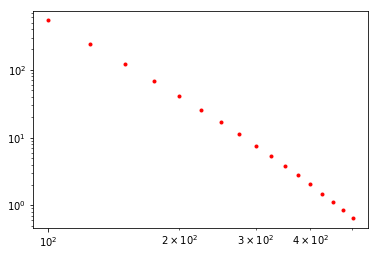

In [17]:
loglog(df['mc1'], df['xs'], 'r.')

In [18]:
x = np.array(df['mc1'])
y = np.array(df['xs'])

In [19]:
p1 = np.polyfit(x, np.log(y),1)
p1

array([-0.01595323,  7.12349873])

In [20]:
a=exp(p1[1])
b=p1[0]
xx = np.linspace(100.0,400.0)
yy = a*np.exp(b*xx)
print a, b

1240.78402179 -0.0159532312871


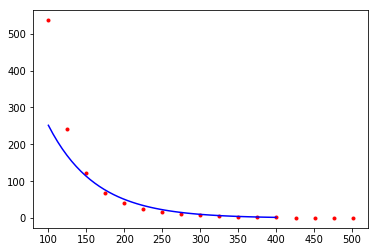

In [21]:
plot(df['mc1'], df['xs'], 'r.')
plot(xx, yy, 'b-')

In [22]:
p2 = np.polyfit(np.log(x), np.log(y),1)
p2

array([ -4.18756921,  25.8022166 ])

In [23]:
a=exp(p2[1])
b=p2[0]
xx = np.linspace(100.0,520.0)
yy = a*xx**b
print a, b

160605453557.0 -4.18756921145


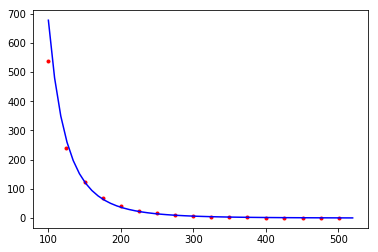

In [24]:
plot(df['mc1'], df['xs'], 'r.')
plot(xx, yy, 'b-')

# Exclusion Regions

In [25]:
data_exp

,x_Mslepton_Gev,xlow,xhigh,x2_Mneutralino_GeV,x2low,x2high,y_sigma_fb
0,101.41,101.41,101.41,19.84,19.84,19.84,72.03
1,101.41,101.41,101.41,29.84,29.84,29.84,569.80
2,101.41,101.41,101.41,49.83,49.83,49.83,2621.74
3,110.38,110.38,110.38,0.00,0.00,0.00,29.21
4,119.51,119.51,119.51,9.84,9.84,9.84,20.06
5,119.51,119.51,119.51,29.84,29.84,29.84,37.14
6,119.51,119.51,119.51,49.83,49.83,49.83,108.10
7,128.78,128.78,128.78,0.00,0.00,0.00,16.83
8,128.78,128.78,128.78,19.84,19.84,19.84,15.39
9,128.78,128.78,128.78,39.83,39.83,39.83,16.56


In [26]:
# New dataframe
names=['MF', 'MS', 'Sigma_Exp_fb', 'Sigma_Model_fb']
data = pd.DataFrame(columns=names)

In [27]:
data['MF'] = data_exp['x_Mslepton_Gev']
data['MS'] = data_exp['x2_Mneutralino_GeV']
data['Sigma_Exp_fb'] = data_exp['y_sigma_fb']

In [28]:
print a, b

160605453557.0 -4.18756921145


In [29]:
data['Sigma_Model_fb'] = a*data['MF']**b

In [30]:
#data.to_csv('colliders/data_with_ATLAS', index_col=0)

In [31]:
# Exclusion regions
excluded = data[data['Sigma_Exp_fb'] > data['Sigma_Model_fb']]
not_excluded = data[data['Sigma_Exp_fb'] < data['Sigma_Model_fb']]

(50, 600)

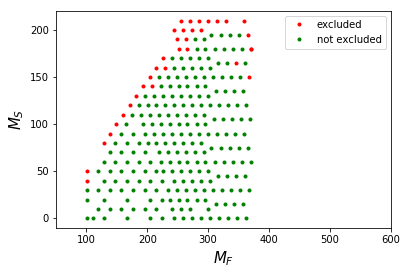

In [32]:
plot(excluded['MF'], excluded['MS'], 'r.', label='excluded')
plot(not_excluded['MF'], not_excluded['MS'], 'g.', label='not excluded')
legend()
xlabel(r'$M_F$', size=15)
ylabel(r'$M_S$', size=15)
xlim(50, 600)

In [33]:
print data[data['MF']>350].MS.min(), data[data['MF']>350].MS.max() 

0.0 209.78


In [34]:
# Dataframe to extrapolate
extrapol = data[data['MF']>356].sort('MS')
extrapol = extrapol.reset_index(drop=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


In [35]:
extrapol['MF']=0.0
extrapol['Sigma_Model_fb']=0.0

In [36]:
m = linspace(380.0, 500.0, 13 )
m

array([ 380.,  390.,  400.,  410.,  420.,  430.,  440.,  450.,  460.,
        470.,  480.,  490.,  500.])

In [37]:
kk = pd.DataFrame()

In [38]:
for i in m:
    extrapol['MF']=i
    kk = kk.append(extrapol)
kk = kk.reset_index(drop=True)
kk['Sigma_Model_fb'] = a*kk['MF']**b

In [39]:
data = data.append(kk)
data = data.reset_index(drop=True)

In [40]:
# Exclusion regions
excluded = data[data['Sigma_Exp_fb'] > data['Sigma_Model_fb']]
not_excluded = data[data['Sigma_Exp_fb'] < data['Sigma_Model_fb']]

(50, 600)

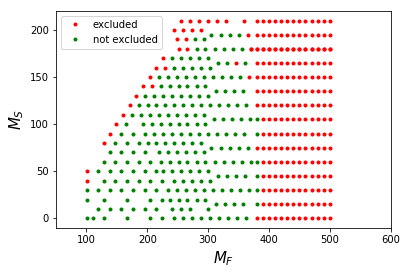

In [41]:
plot(excluded['MF'], excluded['MS'], 'r.', label='excluded')
plot(not_excluded['MF'], not_excluded['MS'], 'g.', label='not excluded')
legend()
xlabel(r'$M_F$', size=15)
ylabel(r'$M_S$', size=15)
xlim(50, 600)

# Exclusion Regions: Line

In [42]:
d_ms = not_excluded.sort('MS')
d_ms = d_ms.reset_index(drop=True)
d_ms.shape

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


(233, 4)

In [43]:
pos = np.zeros(30, dtype=int)
cont = 0
for i in range(1,d_ms.shape[0]-1):
    if d_ms['MS'][i]!=d_ms['MS'][i-1]:
        pos[cont] = i
        cont = cont +1
        #print i, cont
pos[cont] = d_ms.shape[0]-1 

In [44]:
pos

array([ 15,  25,  30,  40,  58,  69,  74,  86, 103, 113, 118, 128, 143,
       152, 158, 167, 180, 188, 192, 198, 208, 213, 216, 221, 227, 229,
       232,   0,   0,   0])

In [45]:
print d_ms['MF'][0:15].min(),d_ms['MF'][0:15].max() 

101.41 363.02


In [46]:
ll = pd.DataFrame(columns=['MS', 'MF_min', 'MF_max'], index = range(0,cont+1))

In [47]:
for pp in range (0, cont+1):
    #print pp, pos[pp-1], d_ms['MS'][pos[pp-1]]
    #print d_ms['MF'][pos[pp-1]:pos[pp]].min()
    ll['MS'][pp] = d_ms['MS'][pos[pp-1]]
    ll['MF_min'][pp] = d_ms['MF'][pos[pp-1]:pos[pp]].min()  
    ll['MF_max'][pp] = d_ms['MF'][pos[pp-1]:pos[pp]].max()

(50, 600)

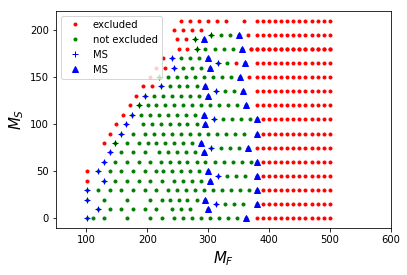

In [48]:
plot(excluded['MF'], excluded['MS'], 'r.', label='excluded')
plot(not_excluded['MF'], not_excluded['MS'], 'g.', label='not excluded')
plot(ll['MF_min'], ll['MS'], 'b+')
plot(ll['MF_max'], ll['MS'], 'b^')
legend()
xlabel(r'$M_F$', size=15)
ylabel(r'$M_S$', size=15)
xlim(50, 600)

In [49]:
ll_a = ll[ll['MF_min']<300]
ll_b = ll[ll['MF_max']>320]

(50, 600)

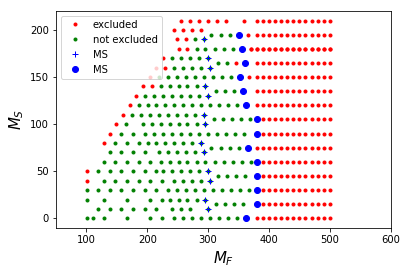

In [50]:
plot(excluded['MF'], excluded['MS'], 'r.', label='excluded')
plot(not_excluded['MF'], not_excluded['MS'], 'g.', label='not excluded')

#plot(ll['MF_min'], ll['MS'], 'b+')
#plot(ll_a['MF_min'], ll_a['MS'], 'bo')

plot(ll['MF_max'], ll['MS'], 'b+')
plot(ll_b['MF_max'], ll_b['MS'], 'bo')

legend()
xlabel(r'$M_F$', size=15)
ylabel(r'$M_S$', size=15)
xlim(50, 600)

(50, 600)

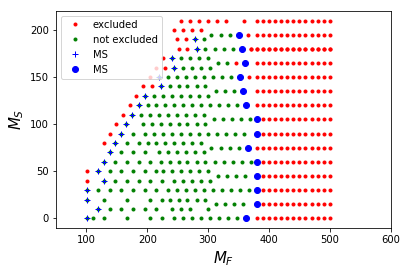

In [51]:
plot(excluded['MF'], excluded['MS'], 'r.', label='excluded')
plot(not_excluded['MF'], not_excluded['MS'], 'g.', label='not excluded')

plot(ll_a['MF_min'], ll_a['MS'], 'b+')

plot(ll_b['MF_max'], ll_b['MS'], 'bo')

legend()
xlabel(r'$M_F$', size=15)
ylabel(r'$M_S$', size=15)
xlim(50, 600)

In [52]:
ll_a = ll_a.append(ll_b.iloc[-1])

(50, 600)

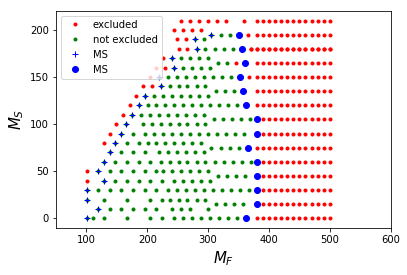

In [53]:
plot(excluded['MF'], excluded['MS'], 'r.', label='excluded')
plot(not_excluded['MF'], not_excluded['MS'], 'g.', label='not excluded')
plot(ll_a['MF_min'], ll_a['MS'], 'b+')
plot(ll_b['MF_max'], ll_b['MS'], 'bo')
legend()
xlabel(r'$M_F$', size=15)
ylabel(r'$M_S$', size=15)
xlim(50, 600)

In [54]:
ll_a = ll_a.drop('MF_max',1)
ll_b = ll_b.drop('MF_min', 1)

In [55]:
ll_a = ll_a.rename(columns={'MF_min':'MF'})
ll_b = ll_b.rename(columns={'MF_max':'MF'})

In [56]:
ll_b = ll_b.sort('MS', ascending=False)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


In [57]:
final_ll = ll_a.append(ll_b)
final_ll = final_ll.reset_index(drop=True)

(50, 600)

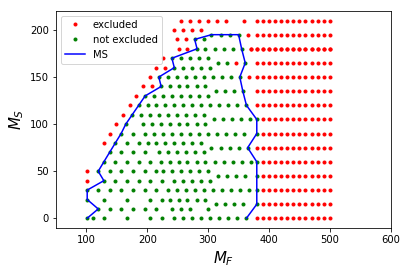

In [58]:
plot(excluded['MF'], excluded['MS'], 'r.', label='excluded')
plot(not_excluded['MF'], not_excluded['MS'], 'g.', label='not excluded')
plot(final_ll['MF'], final_ll['MS'], 'b-')
legend()
xlabel(r'$M_F$', size=15)
ylabel(r'$M_S$', size=15)
xlim(50, 600)